<a href="https://colab.research.google.com/github/tegacodess/My-Data-Projects/blob/main/Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Customer Churn

This task aims to find out the behaviour of customers, whether they will churn or not. This is a classification task (Binary Classification) and different classification algorithms would be used: logistic regression, decision tree, random forest, gradient boost. It would predict the Churn behaviour based on other features in the labelled dataset.


This notebook is one where I practiced classification algorithms as learned during the Machine Learning lesson taught in the Data Science (Cohort 8) program organized by Axia Africa.

### ✔ In this Notebook, I would:
1. Understand the data using data understanding methods
2. Data preparation & preprocessing
3. Train Model
4. Make predictions
5. Evaluate predictions using classification metrics

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/tegacodess/CSV-Files/refs/heads/main/Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Understanding

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


we observe:
* The column *TotalCharges* is having a data type 'object', instead of float64
* There are no missing values in the other column


## Data Preparation

In [ ]:
# check for duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
data['TotalCharges'].unique()
#  the data in this column are strings, it should be converted to float

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
# convert TotalCharges data to float
tc = pd.to_numeric(data['TotalCharges'],errors='coerce' )

In [ ]:
# Check for missing values in the totalcharges column
tc.isna().sum()

np.int64(11)

In [ ]:
# fill missing values
data['TotalCharges'] = tc.fillna(0)

In [ ]:
# for a quick overview of the numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


### Data Preparation 1 (Preparing Target Column)

This is the column we want the model to be able to predict

<Axes: xlabel='Churn'>

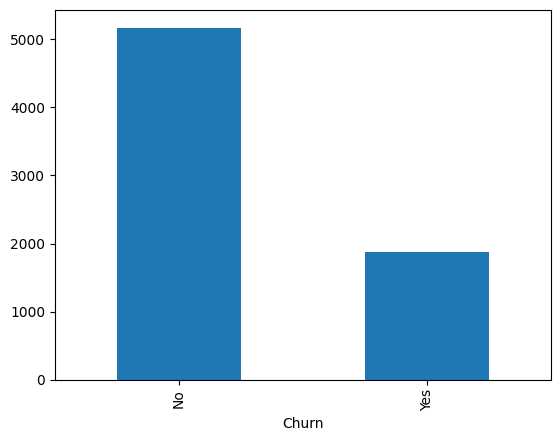

In [ ]:
data['Churn'].value_counts().plot(kind='bar')
# The model would be trained using the target column as it is, and because the data points are not balanced, it will be biased.
# In later sections, a resampling method - oversampling would be adopted to balance the data points.

In [ ]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# convert the textual data to numberical data so the model can understand it.

In [ ]:
data.Churn = (data.Churn == 'Yes').astype(float)

In [ ]:
data.Churn.unique()

array([0., 1.])

### Data Preparation 2 (Feature and Target Data)

Here, the columns would be divided into two; feature and target data.
* feature data: the input data the model will base its prediction
* target: the output data the model is to predict

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
x = data.drop(columns =['Churn', 'customerID'])  #feature data
y = data['Churn'] #target data

In [ ]:
# to split the feature and target data into training data and test data.
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=54, stratify = y)

In [ ]:
cat_cols = x.select_dtypes(include='object').columns.tolist()
num_cols = x.select_dtypes(include = np.number).columns.tolist()

In [ ]:
# for encoding the cat cols and scaling the num cols

from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# encoding the categorical columns
encoder = OneHotEncoder(sparse_output=False).fit(data[cat_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [ ]:
# fit the encoder on the train and test cat cols

x_train[encoded_cols] = encoder.transform(x_train[cat_cols])
x_test[encoded_cols] = encoder.transform(x_test[cat_cols])

In [ ]:
# scaling numerical columns
scaler = StandardScaler()

In [ ]:
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [ ]:
# combine the scaled num cols with the encoded cat cols

x_train = x_train[num_cols + encoded_cols]
x_test = x_test[num_cols + encoded_cols]

### Train the Model: Logistic Regression

In [ ]:
# import the logistic regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

### Evaluation of the model

In [ ]:
datas = pd.DataFrame()
datas['Actual'] = y_train
datas['prediction'] = train_pred

datas['Correct'] = datas['Actual'] == datas['prediction']

In [ ]:
datas.Correct.value_counts()


,count
Correct,
True,4526
False,1108


as earlier stated, the model is biased. The True count is significantly higher than the false.

### Evaluation of the model using classification metrics



*   Accuracy score
*   Precision
* Recall
* F1 score




In [ ]:
# import the metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, f1_score)

In [ ]:
train_accuracy = accuracy_score(train_pred, y_train)
test_accuracy = accuracy_score(test_pred, y_test)

train_accuracy, test_accuracy

(0.8033368832090877, 0.8176011355571328)

## Use Several Classification Models Including Logisting Regression

In [ ]:
# import the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state =42),
    "Random Forest": RandomForestClassifier(random_state =42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=43)
}

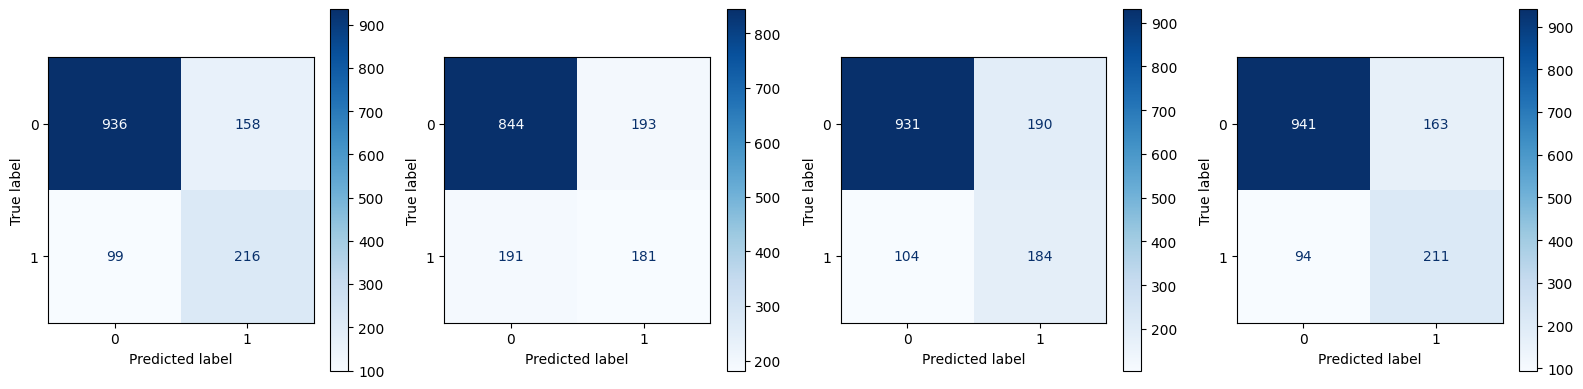


Classification Metrics
                     Train Accuracy  Test Accuracy  Precision Score  \
Logistic Regression            0.80           0.82             0.58   
Decision Tree                  1.00           0.73             0.48   
Random Forest                  1.00           0.79             0.49   
Gradient Boosting              0.82           0.82             0.56   

                     Recall Score  F1 Score  
Logistic Regression          0.69      0.63  
Decision Tree                0.49      0.49  
Random Forest                0.64      0.56  
Gradient Boosting            0.69      0.62  


In [ ]:
# using a for loop to train, predict, and evaluate our models

results = {}
fig, axes = plt.subplots(1,4,figsize = (16,4))

for (name, model), ax in zip (models.items(), axes.flatten()):
  # train the models
  model.fit(x_train, y_train)

  # predict traning and test score
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)

  # evaluate predictions
  train_score = accuracy_score(train_pred, y_train)
  test_score = accuracy_score(test_pred, y_test)
  precision = precision_score(test_pred, y_test)
  recall = recall_score(test_pred, y_test)
  f1_scores = f1_score(test_pred, y_test)

  # store the results
  results[name] = {
      "Train Accuracy": train_score,
      "Test Accuracy":test_score,
      "Precision Score": precision,
      "Recall Score": recall,
      "F1 Score": f1_scores
  }

  # confusion matrix between prediction and test
  cm = confusion_matrix(test_pred, y_test)
  disp = ConfusionMatrixDisplay(cm)
  disp.plot(ax=ax, cmap='Blues')


plt.tight_layout()
plt.show()



# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.T.round(2))

In [ ]:
pd.DataFrame(results)

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting
Train Accuracy,0.803337,0.998225,0.998225,0.824814
Test Accuracy,0.817601,0.727466,0.791341,0.817601
Precision Score,0.577540,0.483957,0.491979,0.564171
Recall Score,0.685714,0.486559,0.638889,0.691803
F1 Score,0.626996,0.485255,0.555891,0.621502


From the metrics above, it is observed that
* the train accuracy scores are nearing 100%, this indicates that the models are overfitted.

#### Balancing the target column to fix overfitting
this will be done using the smote oversampling method. it works by generating synthetic samples for the minority class


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y_train.value_counts()

# note it isn't balanced

,count
Churn,
0.0,4139
1.0,1495


In [ ]:
# only the train data can be resampled

smote = SMOTE(random_state=54)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_resampled.value_counts()

,count
Churn,
0.0,4139
1.0,4139


#### Retrain Models


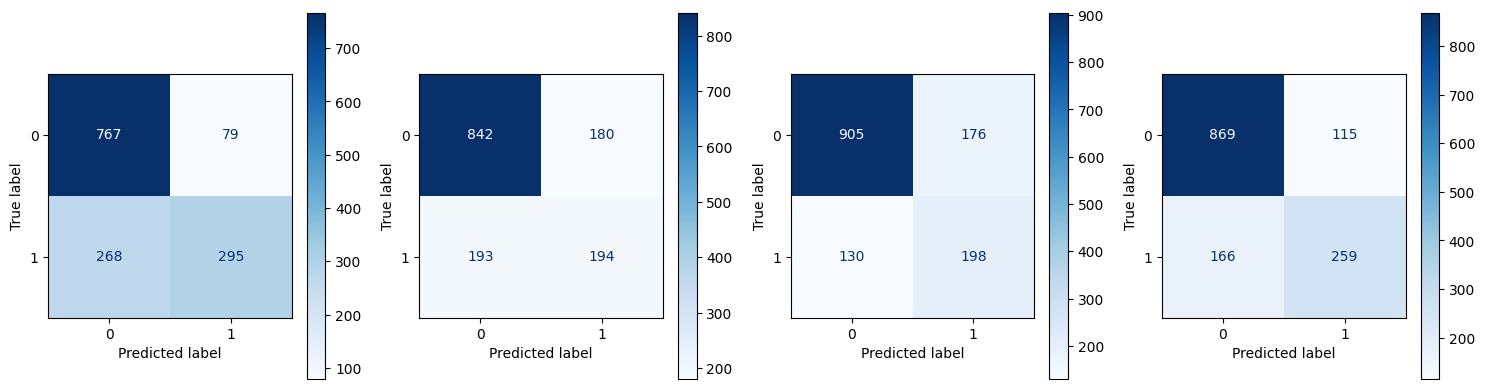


Classification Metrics
                 Logistic Regression  Decision Tree  Random Forest  \
Train Accuracy                  0.78           1.00           1.00   
Test Accuracy                   0.75           0.74           0.78   
Precision Score                 0.79           0.52           0.53   
Recall Score                    0.52           0.50           0.60   
F1 Score                        0.63           0.51           0.56   

                 Gradient Boosting  
Train Accuracy                0.86  
Test Accuracy                 0.80  
Precision Score               0.69  
Recall Score                  0.61  
F1 Score                      0.65  


In [ ]:
# Train, make predictions, and evaluate models

results = {}
fig, axes = plt.subplots(1,4,figsize = (15,4))

for (name, model), ax in zip (models.items(), axes.flatten()):
  # train the models
  model.fit(x_train_resampled, y_train_resampled)

  # predict traning and test score
  train_pred = model.predict(x_train_resampled)
  test_pred = model.predict(x_test)

  # evaluate predictions
  train_score = accuracy_score(train_pred, y_train_resampled)
  test_score = accuracy_score(test_pred, y_test)
  precision = precision_score(test_pred, y_test)
  recall = recall_score(test_pred, y_test)
  f1_scores = f1_score(test_pred, y_test)

  # store the results
  results[name] = {
      "Train Accuracy": train_score,
      "Test Accuracy":test_score,
      "Precision Score": precision,
      "Recall Score": recall,
      "F1 Score": f1_scores
  }

  # confusion matrix between prediction and test
  cm = confusion_matrix(test_pred, y_test)
  disp = ConfusionMatrixDisplay(cm)
  disp.plot(ax=ax, cmap='Blues')


plt.tight_layout()
plt.show()



# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.round(2))

Here is my evaluation:

In the confusion matrix;

* 0 = Will not Churn i.e customer is likely to stay
* 1 = Will Churn i.e customer is likely to leave

Among the models, Gradient Boosting, plot 4, shows the best balance. It has a high number of correct predictions for both churn and non-churn cases.

* The **Logistic Regression Model** showed a balanced performance with a test accuarcy of 75% and its precision score being the highest at 79%. Making this a good choice for our prediction.

* The **Decision Tree Model** had perfect training accuracy (1.00). This indicates overfitting as its test accuracy is significantly lower with a score of 74%. Amongst all the models, it has the lowest precision and recall scores, making this model unsuitable for our prediction.

* The **Random Forest Model** also indicates overfitting with its training accuract score, but it has a better recall score than the decision tree. While it also isn't the best choice for our prediction, it handles imbalance better than the Decision tree model.

* The **Gradient Boosting Model** outperformed the other models by having the highest test accuracy score (80%) and a strong traing accuracy score of 86%. There is a balance across all metrics, making this the most robust and generalizable model for our prediction.

## Conclusion


In this notebook, four classification models were adopted to classify our data (whether customers will churn or not). They were the Logistic Regression, Decision Tree, Random Forest, Gradient Boosting. Initially, signs of overfitting were observed with the Decision tree model. To address this, a resampling technique was applied (Oversampling) to balance the dataset.

Then, the models were retrained on the resampled data, and their performance evaluated using classification metrics; accuracy score, confusion matrix, precision score, recall score and f1 score. Amongst all the models, Gradient Boosting was the most balance and gave consistent result across all metrics, making it the optimal choice for this prediction task.